<h1><center> United States Election 2020: Data Analysis based on Countities Characteristics </center></h1>
<h4><center>Maksym Oliinyk, 1004506377 <br> Big Data Tools for Economists (ECO225H1 S)</center></h4>

---
<h2><bold> Outline: </bold></h2>

1. Introduction  
2. Data Analysis 
3. Summary 
4. Future Steps 




<h2><center> Introduction </center></h2>

---

<h2><center> Data Analysis </center></h2> 

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df_president =  pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_county_candidate.csv")
df_president_enrich = pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_counties.csv")

In [182]:
# Check five first observations and variables in dataset.
df_president.head(5)

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [789]:
# The subset of the dataset; accessing rows with REP party.
df_rep = df_president.loc[df_president.party == "REP"]

# Extracting single column, total_votes.
votes_rep = df_rep["total_votes"]

# Basic summary statistics of total_votes variable for REP party. 
print("Min = ", votes_rep.min(),"\n"\
      "Max = ", votes_rep.max(),"\n"\
      "Mean = ", votes_rep.mean(),"\n"\
      "Standard Deviation = ",votes_rep.std())

Min =  0 
Max =  1145530 
Mean =  16098.79235916253 
Standard Deviation =  45531.30995531571


In [827]:
# The subset of the dataset; accessing rows with DEM party.
df_dem = df_president.loc[df_president.party == "DEM"]

# Extracting single column, total_votes.
votes_dem = df_dem["total_votes"]

# Basic summary statistics of total_votes variable for DEM party. 
print("Min = ", votes_dem.min(),"\n"\
      "Max = ", votes_dem.max(),"\n"\
      "Mean = ", votes_dem.mean(),"\n"\
      "Standard Deviation = ",votes_dem.std())

Min =  0 
Max =  3028885 
Mean =  17709.13749190589 
Standard Deviation =  80206.43718422754


<h3><center> Top Five Candidates based on the total votes </center></h3> 




In [733]:
# Group the dataset by candidate (top 5), and sum up total votes they got. 
df_candidates = df_president[['candidate','total_votes']].groupby(['candidate'], as_index = False).sum()
df_candidates = df_candidates.sort_values(by = "total_votes", ascending = False)
df_candidates = df_candidates.reset_index(drop = True)
df_candidates = df_candidates.head(5)

df_candidates

,candidate,total_votes
0,Joe Biden,82046434
1,Donald Trump,74585705
2,Jo Jorgensen,1874183
3,Howie Hawkins,404835
4,Write-ins,254274


In [734]:
# Create new column percent (percent = "total_votes" / (sum of "total_votes") * 100.
df_candidates["percent"] = df_candidates["total_votes"] / df_candidates["total_votes"].sum() * 100

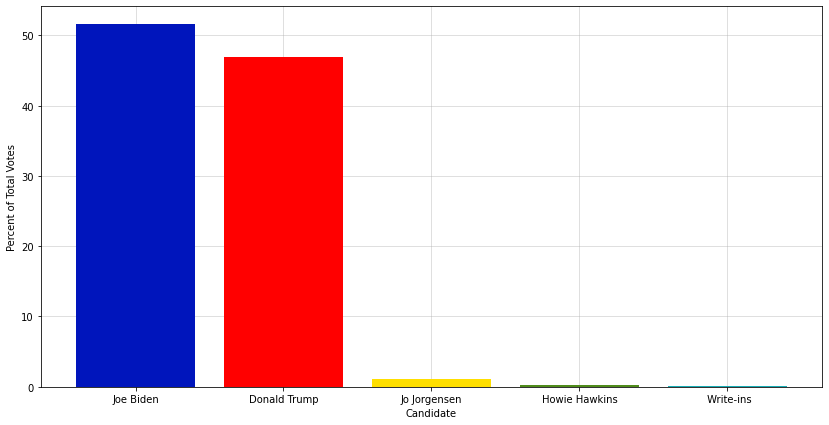

In [765]:
# Plot the barchart of the "percent" (top 5 candidates).
plt.figure(figsize = (14,7))
plt.bar(df_candidates['candidate'], df_candidates['percent'], color=[ '#0015BC', '#FF0000', '#ffdf00', '#508C1B', '#17ADB5'])
plt.xlabel("Candidate")
plt.ylabel("Percent of Total Votes")
plt.grid(alpha = 0.5)
plt.rc('axes', axisbelow = True)

<h3><center> Top Five Parties based on the total votes </center></h3> 



In [736]:
# Group the dataset by party (top 5), and sum up total votes they got. 
df_parties = df_president[[ 'party','total_votes']].groupby(['party'], as_index = False).sum()
df_parties = df_parties.sort_values(by = "total_votes", ascending = False)
df_parties = df_parties.reset_index(drop = True)
df_parties = df_parties.head(5)

df_parties.head(5)

,party,total_votes
0,DEM,82046434
1,REP,74585705
2,LIB,1874183
3,GRN,407508
4,WRI,254274


In [11]:
# Create new column percent (percent = "total_votes" / (sum of "total_votes") * 100.
df_parties["percent"] = df_parties["total_votes"] / df_parties["total_votes"].sum() * 100

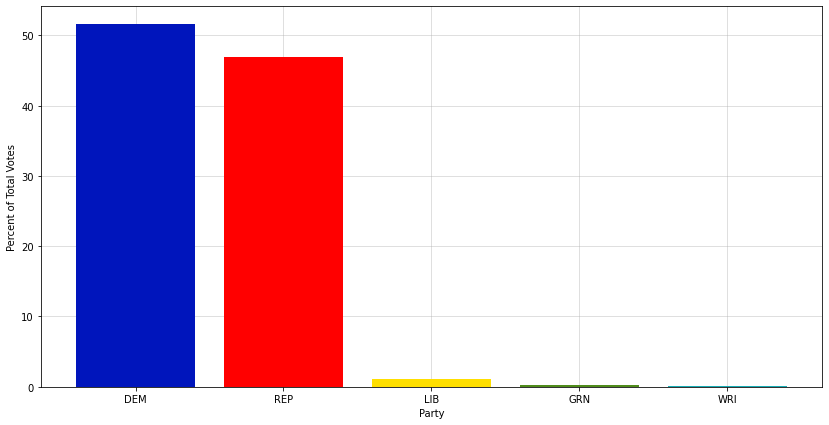

In [12]:
# Plot the barchart of the "percent" (top 5 parties).
plt.figure(figsize = (14,7))
plt.bar(df_parties['party'], df_parties['percent'], color=[ '#0015BC', '#FF0000', '#ffdf00', '#508C1B', '#17ADB5'])
plt.xlabel("Party")
plt.ylabel("Percent of Total Votes")
plt.grid(alpha = 0.5)

<h3><center> Top Five Parties based on the won counties </center></h3> 

In [791]:
# Group the dataset by party (top 5), and sum up total counties they won. 
df_counties = df_president[['party','won']].groupby(['party'], as_index = False).sum()
df_counties = df_counties.sort_values(by = "won", ascending = False)
df_counties = df_counties.reset_index(drop = True)
df_counties = df_counties.head(5)

df_counties

,party,won
0,REP,3219
1,DEM,1410
2,WRI,3
3,LIB,1
4,LLP,0


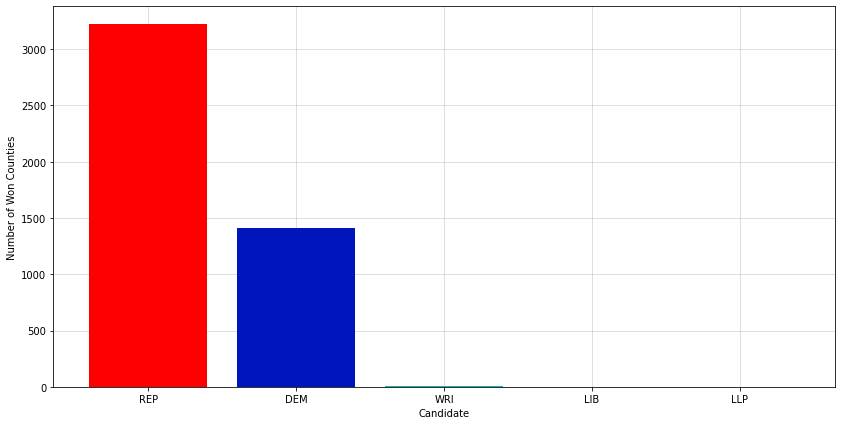

In [792]:
# Plot the barchart of the "won" (top 5 parties).
plt.figure(figsize = (14,7))
plt.bar(df_counties['party'], df_counties['won'], color=[ '#FF0000', '#0015BC','#17ADB5', '#ffdf00', '#508C1B'])
plt.xlabel("Candidate")
plt.ylabel("Number of Won Counties")
plt.grid(alpha = 0.5)

<h3><center> County: Republicans versus Democrats </center></h3> 

In [799]:
# Group the dataset by party and states, and sum up total counties they won in each state and total votes they got. 
df_countities = df_president[['party','won', "state", "total_votes"]].groupby(['party', "state"],\
as_index = False).sum().sort_values(by='state', ascending = True)
df_countities = df_countities.rename(columns = {"won": "won counties"})

# Extract the subset from the dataset; accessing rows with REP and DEM parties.
df_countities = df_countities[df_countities.party.isin(["REP","DEM"]) == True].reset_index(drop = True)

df_countities.head(10)

,party,state,won counties,total_votes
0,DEM,Alabama,13,849648
1,REP,Alabama,54,1441168
2,REP,Alaska,20,189892
3,DEM,Alaska,17,153405
4,DEM,Arizona,5,1672143
5,REP,Arizona,10,1661686
6,REP,Arkansas,67,760647
7,DEM,Arkansas,8,423932
8,DEM,California,35,11109764
9,REP,California,23,6005961


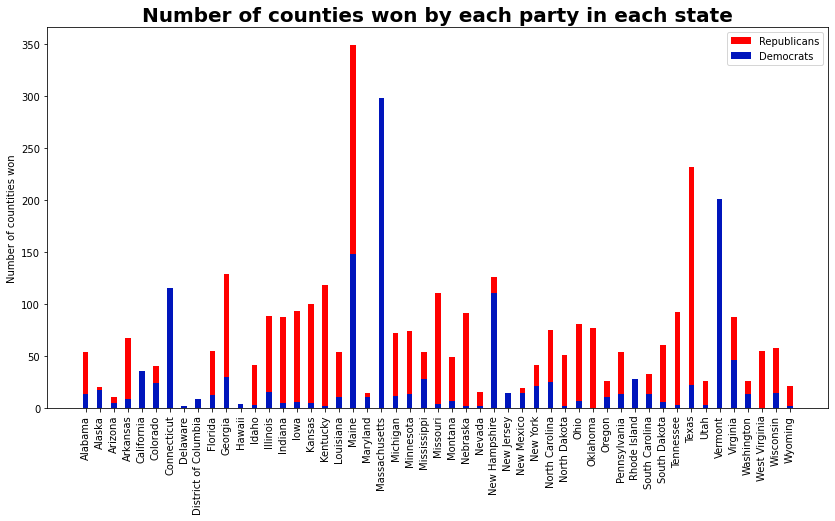

In [803]:
# Extract "won counties" for each party into the list.
rep = list(df_countities.loc[df_countities['party'] == "REP"]["won counties"])
dem = list(df_countities.loc[df_countities['party'] == "DEM"]["won counties"])

# Extract unique "state" strings into the list.
x = list(df_countities["state"].unique())
X_axis = np.arange(len(x))

# Plot the barchart of "won counties" for each candidate. 
plt.figure(figsize = (14,7))
plt.bar(x, rep, 0.4, label = 'Republicans', color = "#FF0000")
plt.bar(x, dem, 0.4, label = 'Democrats', color = "#0015BC")
plt.xticks(X_axis, x)
plt.ylabel("Number of countities won")
plt.title("Number of counties won by each party in each state", fontweight = 'bold', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)

plt.show()

In [806]:
# Extract the subset from the data set; accessing rows with REP and DEM parties.
df_rd = df_president[df_president.party.isin(["REP","DEM"]) == True].reset_index(drop = True)
# Merge the df_dj subset with additional enriched dataset.
df_rd = df_rd.merge(df_president_enrich[["state", "county", "population","female_percentage","median_age"]])    

In [813]:
# Creating two different DataFrames for eqch candidate.
df_rep = df_rd.loc[df_rd.party == "REP"]
df_dem = df_rd.loc[df_rd.party == "DEM"]

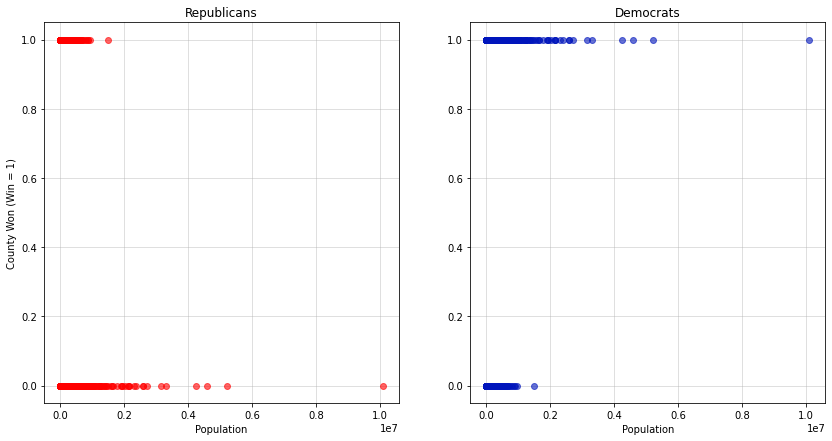

In [815]:
# Plot scatterplot won county with respect to population.
# Create two plot with 1 row and 2 columns.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7))

# Add scatterplots
ax1.scatter(df_rep['population'] ,df_rep['won'] , color=['#FF000099'])
ax2.scatter(df_dem['population'] ,df_dem['won'] , color=['#0015BC99'])
ax1.title.set_text("Republicans")
ax2.title.set_text("Democrats")
ax1.set_xlabel("Population")
ax2.set_xlabel("Population")
ax1.set_ylabel("County Won (Win = 1)")
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)



In [822]:
# Lock observations to counties where candidate won. 
df_rep = df_rep.loc[df_rep.won == True]
df_dem = df_dem.loc[df_dem.won == True]

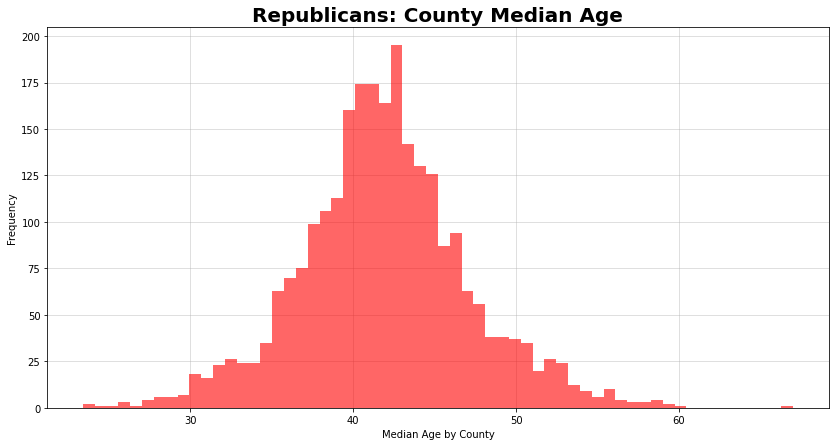

In [823]:
# Plot histogram of median age for REP party (county level). 
plt.figure(figsize = (14,7))
plt.hist(df_rep['median_age'], bins = 60, color=['#FF000099'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Republicans: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

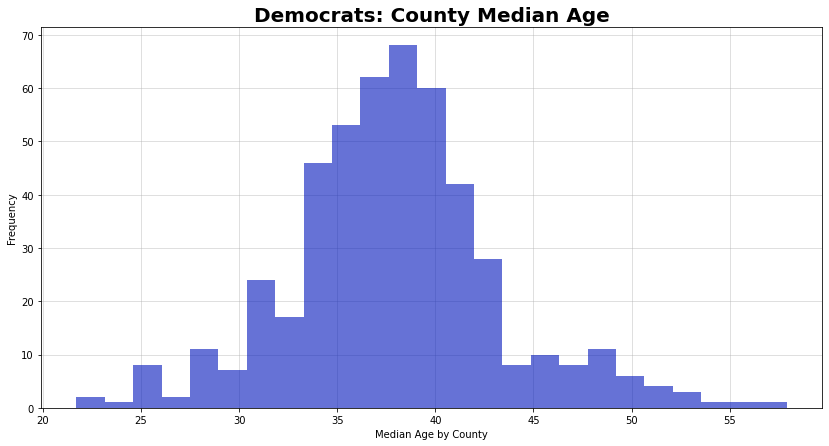

In [824]:
# Plot histogram of median age for DEM party (county level).  
plt.figure(figsize = (14,7))
plt.hist(df_dem['median_age'], bins = 25,  color=['#0015BC99'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Democrats: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

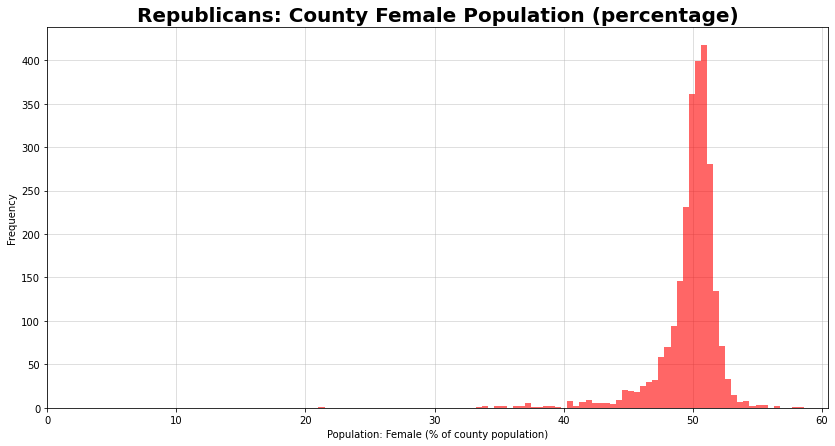

In [825]:
# Plot histogram of female percentage of county population for REP party.
plt.figure(figsize = (14,7))
plt.hist(df_rep['female_percentage'], bins = 80, color=['#FF000099'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Republicans: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

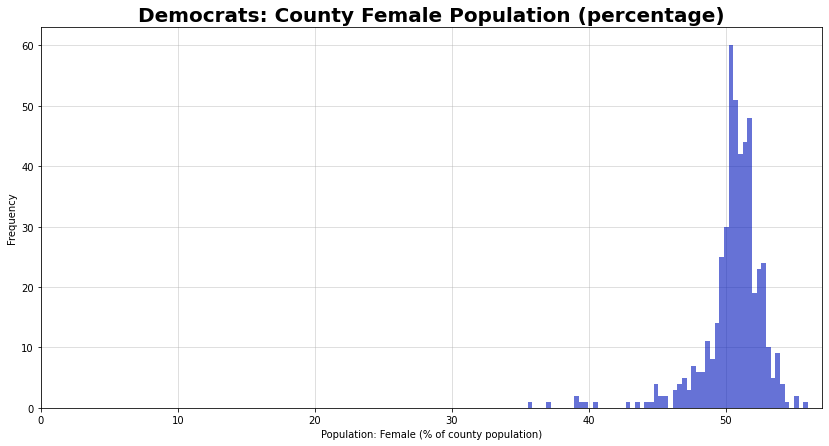

In [826]:
# Plot histogram of female percentage of county population for DEM party.
plt.figure(figsize = (14,7))
plt.hist(df_dem['female_percentage'], bins = 60, color=['#0015BC99'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Democrats: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

<h2><center> Summary </center></h2>

---

In [ ]:
###

<h2><center> Other Data Sources </center></h2>

---

In [463]:
df_president_enrich

,Unnamed: 0,state,county,candidate,party,total_votes,won,fips,state_code,male,female,median_age,population,female_percentage,lat,long,color
2799,16658,Alabama,Lawrence County,Donald Trump,REP,12322,True,1079,AL,16003,17168,42.2,33171,51.756052,34.521678,-87.310991,red
2802,16670,Alabama,Lowndes County,Joe Biden,DEM,4972,True,1085,AL,4830,5406,41.6,10236,52.813599,32.154746,-86.650108,blue
2803,16674,Alabama,Macon County,Joe Biden,DEM,7108,True,1087,AL,8790,10264,38.0,19054,53.867954,32.385939,-85.692656,blue
2804,16678,Alabama,Madison County,Donald Trump,REP,102780,True,1089,AL,174665,182895,38.5,357560,51.150856,34.763090,-86.550225,red
2805,16682,Alabama,Marengo County,Joe Biden,DEM,5488,True,1091,AL,9446,10092,42.7,19538,51.653189,32.247665,-87.789531,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,16426,Wyoming,Carbon County,Donald Trump,REP,5014,True,56007,WY,8332,7145,38.0,15477,46.165278,41.694360,-106.930667,red
2745,16421,Wyoming,Campbell County,Donald Trump,REP,16975,True,56005,WY,24559,23149,33.5,47708,48.522260,44.248188,-105.548208,red
2744,16416,Wyoming,Big Horn County,Donald Trump,REP,4806,True,56003,WY,6033,5868,41.3,11901,49.306781,44.526690,-107.995183,red
2762,16506,Wyoming,Teton County,Joe Biden,DEM,9848,True,56039,WY,11911,11148,39.3,23059,48.345548,43.934651,-110.589818,blue


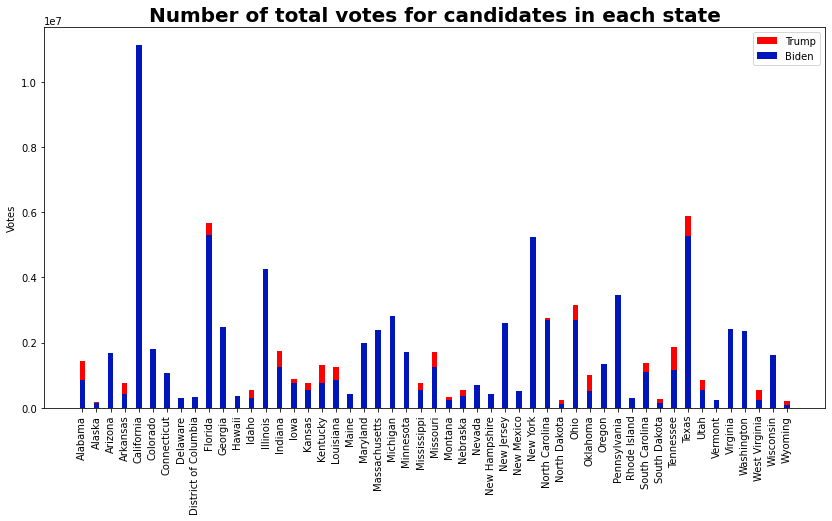

In [670]:
x = list(df_countities["state"].unique())

trump = list(df_countities.loc[df_countities['candidate'] == "Donald Trump"]["total_votes"])
biden = list(df_countities.loc[df_countities['candidate'] == "Joe Biden"]["total_votes"])

X_axis = np.arange(len(x))
plt.figure(figsize = (14,7))
plt.bar(x, trump, 0.4, label = 'Trump', color = "#FF0000")
plt.bar(x, biden, 0.4, label = 'Biden', color = "#0015BC")

plt.xticks(X_axis, x)
plt.ylabel("Votes")
plt.title("Number of total votes for candidates in each state", fontweight = 'bold', fontsize = 20 )
plt.legend()
plt.xticks(rotation=90)
plt.show()

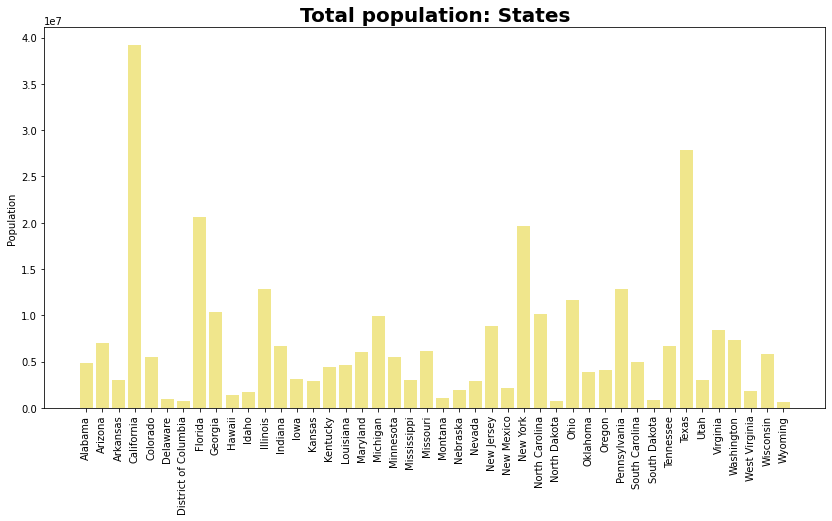

In [669]:
pop = df_president_enrich[["state", "population"]].groupby("state", as_index = False).sum()

plt.figure(1, figsize = (14,7))
plt.bar(pop['state'], pop['population'], color=['#f0e68c'])
plt.ylabel("Population")
plt.title("Total population: States", fontweight = 'bold', fontsize = 20)
plt.xticks(rotation=90)
plt.rc('axes', axisbelow = True)